In [1]:
#import library

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D
from keras.layers import MaxPooling2D, BatchNormalization, Dropout

import keras.backend as K
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils
from keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K


from google.colab import files

In [2]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
X_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
# # Normalize

# X_train = X_train / 255.0
# X_train = X_test / 255.0

In [6]:
from tensorflow.keras.utils import to_categorical
#Categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [7]:
Y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [8]:
input_shape = X_train.shape[1:]

def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [9]:
K.clear_session()
model = createModel()

In [10]:
model.compile(optimizer= 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [12]:
hist = model.fit(X_train, Y_train, epochs= 25, batch_size = 80, shuffle= True, validation_data=(X_test,Y_test))

Epoch 1/25
625/625 [==============================] - 46s 21ms/step - loss: 1.9216 - accuracy: 0.2861 - val_loss: 1.4239 - val_accuracy: 0.4741
Epoch 2/25
625/625 [==============================] - 13s 21ms/step - loss: 1.4434 - accuracy: 0.4699 - val_loss: 1.2894 - val_accuracy: 0.5339
Epoch 3/25
625/625 [==============================] - 13s 21ms/step - loss: 1.2701 - accuracy: 0.5466 - val_loss: 1.1378 - val_accuracy: 0.5932
Epoch 4/25
625/625 [==============================] - 13s 21ms/step - loss: 1.1510 - accuracy: 0.5930 - val_loss: 1.0025 - val_accuracy: 0.6493
Epoch 5/25
625/625 [==============================] - 13s 21ms/step - loss: 1.0725 - accuracy: 0.6228 - val_loss: 0.9503 - val_accuracy: 0.6643
Epoch 6/25
625/625 [==============================] - 13s 21ms/step - loss: 1.0340 - accuracy: 0.6398 - val_loss: 0.8846 - val_accuracy: 0.6931
Epoch 7/25
625/625 [==============================] - 13s 21ms/step - loss: 0.9753 - accuracy: 0.6623 - val_loss: 0.8469 - val_accuracy:

In [13]:
score = model.evaluate(X_test,Y_test)
print("Accuracy: ",score[1]*100,"%")

313/313 [==============================] - 2s 6ms/step - loss: 0.6811 - accuracy: 0.7812
Accuracy:  78.11999917030334 %


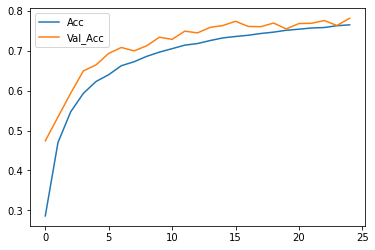

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acc','Val_Acc'])
plt.show()

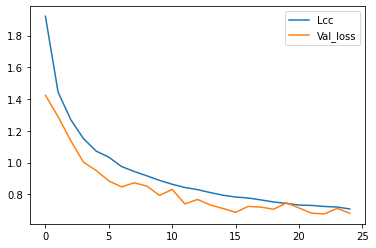

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Lcc','Val_loss'])
plt.show()

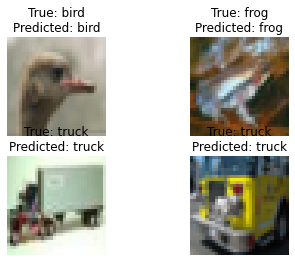

In [22]:
dict_label = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
def predict():
    some_random_number= np.random.randint(low = 0 , high = len(X_test)-1,size=4)
    sample_images = X_train[some_random_number]
    sample_label = Y_train[some_random_number]
    predicted = model.predict(sample_images)
    predicted = np.argmax(predicted,axis=1)
    true_label = np.argmax(sample_label,axis=1)
    fig,axs = plt.subplots(2,2)
    for row in range(2):
        for col in range(2):
            if row == 0 :
                true = true_label[row+col]
                pred = predicted[row+col]
                axs[row, col].imshow(sample_images[row+col])
            else:
                true = true_label[row+col+1]
                pred = predicted[row+col+1]
                axs[row, col].imshow(sample_images[row+col+1])
            axs[row, col].set_title('True: %s\nPredicted: %s' % (dict_label[true], dict_label[pred]))
            axs[row, col].axis('off')
            
predict()